<a href="https://colab.research.google.com/github/Devisriram/Basic-ML/blob/main/Titanic_APPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Explorative Data Analysis(EDA)**


> Explorative Data Analysis is a process where one lerns about the data, forms insights and indentifies important columns (features) that can be user to tell a story or later formulate a ML problem.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



> >the warning library has been imported to surpass the warning using the commands warning.filterwarning("ignore")




In [6]:
df = pd.read_csv("/content/train.csv")

>The data has been imported as a dataset into variable data using the method .read_csv() method of Pandas Library.
>>the sixe of the data can be known using shape as shown here.


In [7]:
df.shape

(891, 12)

> it is observed that this dataset contains 891 observations with 12 features.

>> The .head() and .tail() methods can be used to show a dataframe consisting of first five rows and last five rows respectively.

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now, we will describe about the data

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>the .describe() method gives mean,min,max,median,Q!, and Q3..

Now, we will see about the Null values in the data.

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above data, it is known that the features Age, Cabin and Embarked have null values.
This null values are to be filled.


# **Data Visualization**
>Data Visualization is the act of taking information (data) and playing it into a visual content, such as a map or a graph. Data visualizations make big and small data easier for the human brain to understand and visualization also makes it easier to detect patterns, trends, and outliers in group of data.

Let's get an understanding on the Survived and Death of Passengers using a PIE CHART..

([<matplotlib.patches.Wedge at 0x7f439e40c1d0>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Survived'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Dead')],
 [Text(0.21413173030478264, 0.5604887171716125, '38.4%'),
  Text(-0.2141316778280411, -0.5604887372200694, '61.6%')])

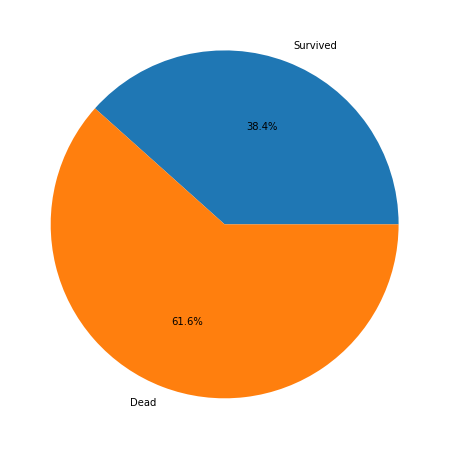

In [13]:
survived_sum=df['Survived'].sum()
dead_sum=df['Survived'].value_counts().sum()-survived_sum
lab=['Survived','Dead']
data=[survived_sum,dead_sum]
plt.figure(figsize=(8,8))
plt.pie(data,labels=lab,autopct='%1.1f%%')

>it shows that only 38.4% of total Passengers are survived from the Titanic Tragady.

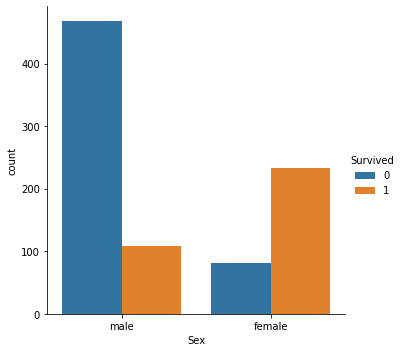

In [14]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)

>from the above graph it is understood that Males are not survives much as compared to femails in the incident.

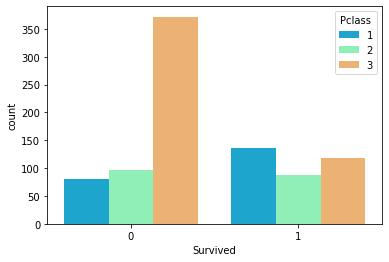

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

The above plot shows that the survival rate of the 3rd class is far less while it is mare for the 1st class.

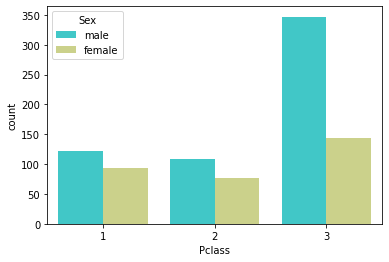

In [16]:
sns.countplot(x="Pclass", hue="Sex", data=df, palette='rainbow')

> Amoung all the other classes the third class has a large count of males and in other the count is in approx the same..

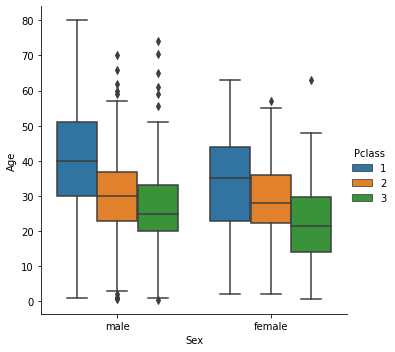

In [17]:
sns.catplot(x='Sex', y='Age', hue='Pclass', kind='box', data=df)

>From the above plot, we infer that most of the older people were traveling in first class. It may be because they were rich. The youngsters who are aged between 25 and 35 were mostly traveling in second and third classes.

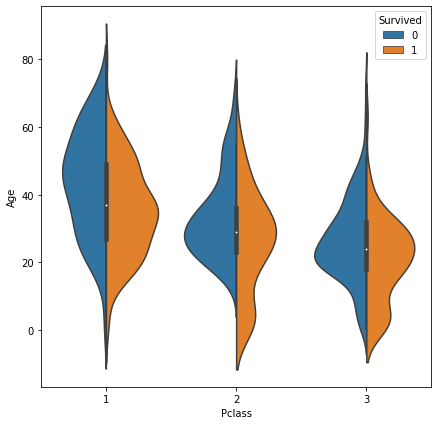

In [18]:
plt.figure(figsize=(7,7))
sns.violinplot(y='Age', x='Pclass', hue='Survived', data=df, split=1)

>The above Violin plot shows that Age plays a major role in Survival of the person. Passengers of first class are of in more number who survived. The age group 20-40 shows more number of survival.

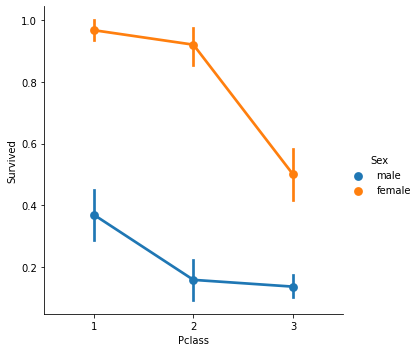

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

>From the above plot, The survival rate of males is reduced with the decrease in class whereas female passengers of 1st class has more survival rate

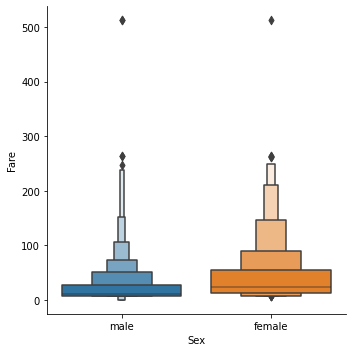

In [20]:
sns.catplot(x='Sex', y='Fare', data=df, kind='boxen')

The above box plot indicates that the fare of female passengers is greater higher than male passengers.

Hence from the above,


*   Age plays key role in determination of survival hence 
it's null values have to be filled.
*   Fale passengers have more chances of survival than Males.
*   Passengers of Class 1 have more chance of survival.
*   The features Name, PassengerId, Ticket can be dropped as they won't contibute towards prediction of survival.

# **Data Cleaning**

In [21]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [22]:
miss_val=df.isnull().sum()
print(miss_val[miss_val>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


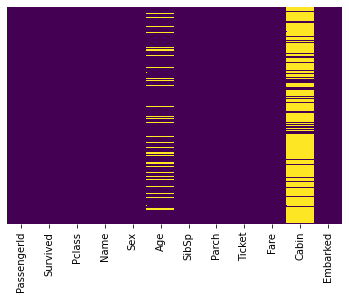

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

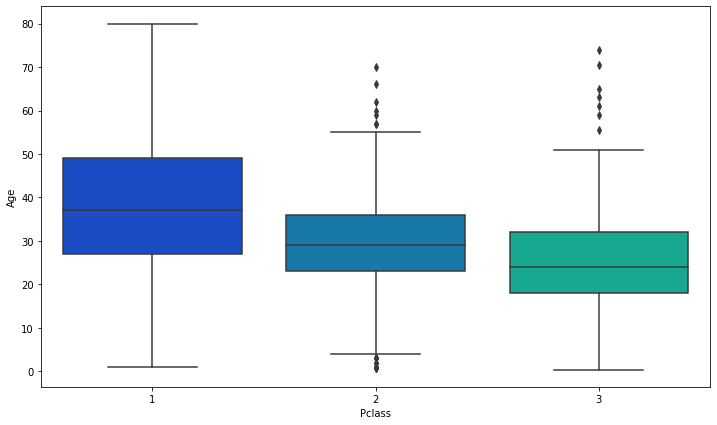

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

>The above box plot relieves that the Age depends on the Class. Hence the null values containing in the column of Age are filled with the mean age of the respective Class.

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

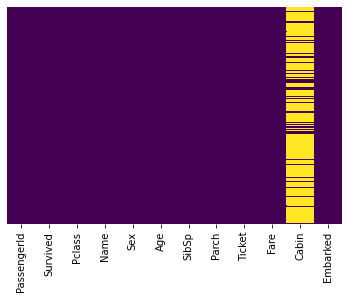

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
df.drop('Cabin',axis=1,inplace=True)

In [29]:
def impute_embarked(cols):
    Embarked = cols[0]
    
    if pd.isnull(Embarked):
        return 'S'
    else:
        return Embarked

df['Embarked']=df[['Embarked']].apply(impute_embarked,axis=1)

In [30]:
df['Embarked'].isnull().sum()

0

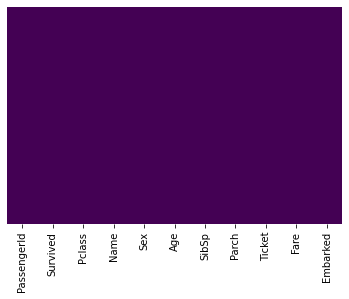

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

By the above heat map it is known that their are No null values..

In [32]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [34]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
pclass = pd.get_dummies(df['Pclass'],drop_first=True)

> The string data is converted into binary // the dummy values (categorical values) in a column are replaced by binary digits using the method .get_dummies and the first columns are dropped.



In [37]:
df.drop(['Sex','Embarked','Pclass','Name','Ticket'],axis=1,inplace=True)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
df = pd.concat([df,sex,embark,pclass],axis=1)

>The numerical columns build after using the method .get_dummies() are concatinated to the DataFrame df using the method .concat()

In [39]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


>The above Data FRame is the final cleaned data without any null values and are not of string dtype.

# **Splitting Data for Training and Testing**

In [40]:
y = df["Survived"]
X = df.drop("Survived",axis=1)

>The target column Survived is assigned to y and the remaining data frame without Survived column is assigned to X

In [41]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size = 0.2,random_state=1)

>The available data is split into 80% for training and 20% for testing.

# **Model Validation**

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

>The required libraries/modules for finding the accuracy are being imported.

# **Random Forest Classifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(random_state=101)

>Fitting

In [44]:
random_model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

>Prediction

In [45]:
random_preds = random_model.predict(test_X)

The predictions are made and are assigned to random_preds. Now the accuracy is to be calculated using the imported libraries/modules.
>Score Calculation

In [46]:
print(classification_report(test_y,random_preds))
random_acc=round(metrics.accuracy_score(test_y,random_preds)*100,0)
print("Accuracy = ",random_acc)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.84      0.63      0.72        73

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

Accuracy =  80.0


# **Decision Tree Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier(random_state=10)

>Fitting

In [48]:
decision_model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

The model is fitted with train_X and train_y for further prediction.

>Prediction

In [49]:
decision_preds =decision_model.predict(test_X)

The predictions are made and are assigned to decision_preds. Now the accuracy is to be calculated using the imported libraries/modules.

>Score Calculation

In [50]:
print(classification_report(test_y,decision_preds))
decision_acc=round(metrics.accuracy_score(test_y,decision_preds)*100,2)
print("Accuracy = ",decision_acc)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       106
           1       0.70      0.64      0.67        73

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Accuracy =  74.3


# **Logistic Regresion**

In [51]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(random_state=11)

>Fitting

In [52]:
log_model.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The model is fitted with train_X and train_y for further prediction.

>Prediction

In [53]:
log_preds=log_model.predict(test_X)

The predictions are made and are assigned to log_preds. Now the accuracy is to be calculated using the imported libraries/modules.

>Score Validation

In [54]:
print(classification_report(test_y,log_preds))
log_acc=round(metrics.accuracy_score(test_y,log_preds)*100,2)
print("Accuracy = ",log_acc)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.77      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy =  78.21


# **Accuracy Values**

In [55]:
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','LogisticRegression', 
              'RandomForestClassifier' 
              ],
    'Accuracy': [decision_acc,log_acc,random_acc]})
result_df = results.sort_values(by='Accuracy',ascending=0)
result_df = result_df.set_index('Accuracy')
results.head()

,Model,Accuracy
0,DecisionTreeClassifier,74.30
1,LogisticRegression,78.21
2,RandomForestClassifier,80.00


>The above DataFrame shows the accuracies obtained from the respective models.



> 

